<a href="https://colab.research.google.com/github/Sinha878/Sinha878/blob/main/Stockprice%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Stock price prediction 

In [36]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
from google.colab import files
files.upload()

Saving Google_Stock_Price_Train12.csv to Google_Stock_Price_Train12 (1).csv


{'Google_Stock_Price_Train12.csv': b'Date,Open,High,Low,Close,Volume\r\n01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"\r\n01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"\r\n01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"\r\n01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"\r\n01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"\r\n01-10-2012,313.7,315.72,307.3,621.43,"88,24,000"\r\n01-11-2012,310.59,313.52,309.4,624.25,"48,17,800"\r\n01-12-2012,314.43,315.26,312.08,627.92,"37,64,400"\r\n1/13/2012,311.96,312.3,309.37,623.28,"46,31,800"\r\n1/17/2012,314.81,314.81,311.67,626.86,"38,32,800"\r\n1/18/2012,312.14,315.82,309.9,631.18,"55,44,000"\r\n1/19/2012,319.3,319.3,314.55,637.82,"1,26,57,800"\r\n1/20/2012,294.16,294.4,289.76,584.39,"2,12,31,800"\r\n1/23/2012,291.91,293.23,290.49,583.92,"68,51,300"\r\n1/24/2012,292.07,292.74,287.92,579.34,"61,34,400"\r\n1/25/2012,287.68,288.27,282.13,567.93,"1,00,12,700"\r\n1/26/2012,284.92,286.17,281.22,566.54,"64,76,500"\r\n1/27/2012,284.32,28

In [62]:
df = pd.read_csv('Google_Stock_Price_Train12.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df.index.name='Date'
df

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2012-01-03,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
2012-01-04,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2012-01-05,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
2012-01-06,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
2012-01-09,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
2016-12-23,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
2016-12-27,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
2016-12-28,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"


In [63]:
df.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2012-01-03,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
2012-01-04,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2012-01-05,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
2012-01-06,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
2012-01-09,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [64]:
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 68.8+ KB


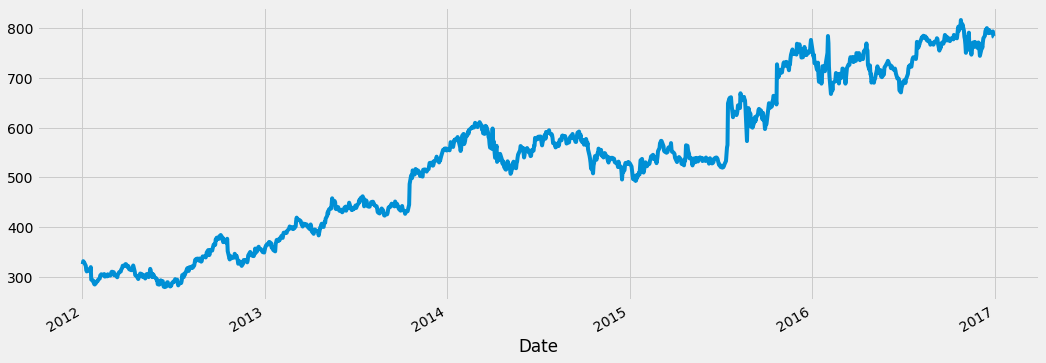

In [66]:
df['Open'].plot(figsize=(16,6))

In [70]:
df["Close"] = df["Close"].str.replace(',','').astype(float)

In [71]:
df["Volume"] = df["Volume"].str.replace(',','').astype(float)

In [73]:
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


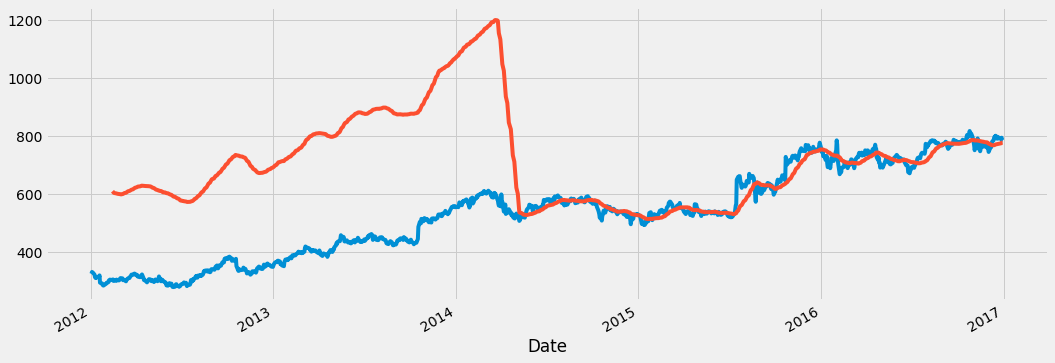

In [74]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

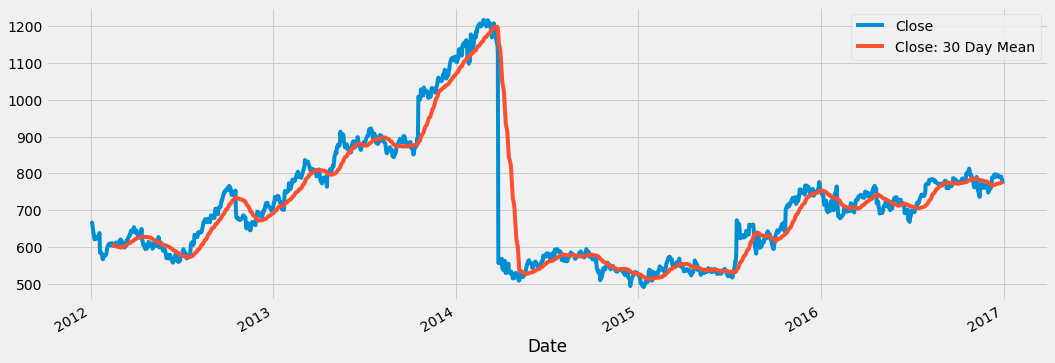

In [75]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

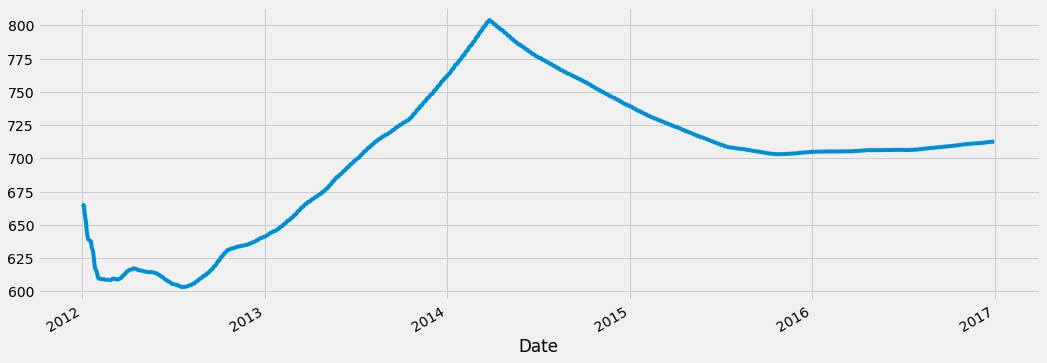

In [77]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [78]:
training_set=df['Open']
training_set=pd.DataFrame(training_set)


In [79]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [81]:
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [87]:
regressor.add(LSTM(units=50, return_sequences =True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))



In [89]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 35s 174ms/step - loss: 0.0911
Epoch 2/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0079
Epoch 3/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0074
Epoch 4/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0066
Epoch 5/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0070
Epoch 6/100
38/38 [==============================] - 7s 177ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0061
Epoch 8/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0058
Epoch 9/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0063
Epoch 11/100
38/38 [==============================] - 7s 189ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0054
Epoch 13/100

In [97]:
from google.colab import files
files.upload()

Saving Google_Stock_Price_Test 22.csv to Google_Stock_Price_Test 22.csv


{'Google_Stock_Price_Test 22.csv': b'Date,Open,High,Low,Close,Volume\r\n01-03-2017,778.81,789.63,775.8,786.14,"16,57,300"\r\n01-04-2017,788.36,791.34,783.16,786.9,"10,73,000"\r\n01-05-2017,786.08,794.48,785.02,794.02,"13,35,200"\r\n01-06-2017,795.26,807.9,792.2,806.15,"16,40,200"\r\n01-09-2017,806.4,809.97,802.83,806.65,"12,72,400"\r\n01-10-2017,807.86,809.13,803.51,804.79,"11,76,800"\r\n01-11-2017,805,808.15,801.37,807.91,"10,65,900"\r\n01-12-2017,807.14,807.39,799.17,806.36,"13,53,100"\r\n1/13/2017,807.48,811.22,806.69,807.88,"10,99,200"\r\n1/17/2017,807.08,807.14,800.37,804.61,"13,62,100"\r\n1/18/2017,805.81,806.21,800.99,806.07,"12,94,400"\r\n1/19/2017,805.12,809.48,801.8,802.17,"9,19,300"\r\n1/20/2017,806.91,806.91,801.69,805.02,"16,70,000"\r\n1/23/2017,807.25,820.87,803.74,819.31,"19,63,600"\r\n1/24/2017,822.3,825.9,817.82,823.87,"14,74,000"\r\n1/25/2017,829.62,835.77,825.06,835.67,"14,94,500"\r\n1/26/2017,837.81,838,827.01,832.15,"29,73,900"\r\n1/27/2017,834.71,841.95,820.44,823

In [101]:
df_test = pd.read_csv('Google_Stock_Price_Test 22.csv')
df_test=df_test.set_index(pd.DatetimeIndex(df_test['Date'].values))
df_test.index.name='Date'
df_test


,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-01-03,01-03-2017,778.81,789.63,775.80,786.14,"16,57,300"
2017-01-04,01-04-2017,788.36,791.34,783.16,786.90,"10,73,000"
2017-01-05,01-05-2017,786.08,794.48,785.02,794.02,"13,35,200"
2017-01-06,01-06-2017,795.26,807.90,792.20,806.15,"16,40,200"
2017-01-09,01-09-2017,806.40,809.97,802.83,806.65,"12,72,400"
2017-01-10,01-10-2017,807.86,809.13,803.51,804.79,"11,76,800"
2017-01-11,01-11-2017,805.00,808.15,801.37,807.91,"10,65,900"
2017-01-12,01-12-2017,807.14,807.39,799.17,806.36,"13,53,100"
2017-01-13,1/13/2017,807.48,811.22,806.69,807.88,"10,99,200"


In [102]:
real_stock_price = df_test.iloc[:, 1:2].values

In [103]:
df_test.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2017-01-03,01-03-2017,778.81,789.63,775.80,786.14,"16,57,300"
2017-01-04,01-04-2017,788.36,791.34,783.16,786.90,"10,73,000"
2017-01-05,01-05-2017,786.08,794.48,785.02,794.02,"13,35,200"
2017-01-06,01-06-2017,795.26,807.90,792.20,806.15,"16,40,200"
2017-01-09,01-09-2017,806.40,809.97,802.83,806.65,"12,72,400"


In [104]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [105]:
df_test["Volume"] = df_test["Volume"].str.replace(',','').astype(float)

In [107]:
test_set=df_test["Open"]
test_set=pd.DataFrame(test_set)

In [108]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [111]:
df_total =pd.concat((df['Open'], df_test['Open']),axis=0)
inputs = df_total[len(df_total) - len(df_test) -60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i, 0])
x_test =np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [112]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


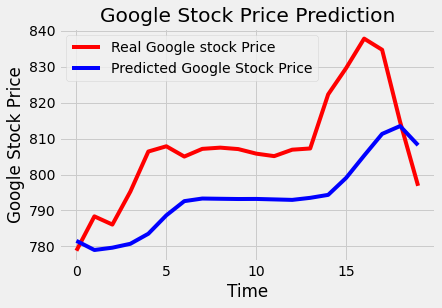

In [114]:
plt.plot(real_stock_price, color = 'red',label = 'Real Google stock Price')
plt.plot(predicted_stock_price,color = 'blue',label ='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()